In [40]:
from __future__ import division, print_function, unicode_literals
from sklearn import linear_model
import urllib.request
import urllib
import pandas as pd

In [41]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [42]:
from sklearn.cluster import KMeans

In [90]:
customers=pd.read_csv('customers_list.csv')

In [91]:
customers=customers.iloc[:,2:]

In [92]:
list(customers)

['promo_per',
 'unique_store',
 'sales_cus',
 'uniq_prod',
 'n_tran',
 'disc_per',
 'Q2',
 'Q3',
 'Q4',
 'mean',
 'c.Q2',
 'c.Q3',
 'c.Q4',
 'c.mean']

In [93]:
X=customers.loc[:, ['promo_per',
 'unique_store',
 'sales_cus',
 'uniq_prod',
 'n_tran',
 'disc_per',
 'Q2',
 'Q3',
 'Q4',
 'mean',
 'c.Q2',
 'c.Q3',
 'c.Q4',
 'c.mean']]

In [94]:
from sklearn import preprocessing
names = X.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [95]:
customers

,promo_per,unique_store,sales_cus,uniq_prod,n_tran,disc_per,Q2,Q3,Q4,mean,c.Q2,c.Q3,c.Q4,c.mean
0,0.175361,4,10317.01,936,440,0.055229,13.0000,20.355,29.2450,22.152750,0.0,0.000000,0.000000,0.049079
1,0.282612,3,11890.33,1315,352,0.149955,16.9375,26.530,37.9125,28.713949,0.0,0.000000,0.138288,0.092452
2,0.351973,3,9171.25,815,567,0.193928,6.7900,11.130,16.5100,13.038254,0.0,0.000000,0.251799,0.125043
3,0.447119,6,6733.41,983,171,0.201682,9.6000,27.050,46.5150,31.435088,0.0,0.000000,0.334572,0.157918
4,0.517974,5,12680.91,1114,351,0.237754,15.8800,23.930,34.4800,27.538376,0.0,0.100167,0.377358,0.192308
5,0.407394,3,5239.71,923,296,0.163087,9.2450,13.185,17.9350,14.814797,0.0,0.000000,0.320261,0.147025
6,0.366286,4,7483.58,904,161,0.171275,7.9500,18.610,48.8000,38.520683,0.0,0.000000,0.252525,0.126015
7,0.244042,20,8353.97,1218,394,0.124467,8.4400,14.725,24.2425,18.563909,0.0,0.000000,0.000000,0.076077
8,0.414868,4,6486.64,653,276,0.194930,8.7450,14.640,23.3275,18.921014,0.0,0.000000,0.311419,0.144500
9,0.362529,30,6510.60,548,281,0.162036,6.7500,16.310,28.0600,19.415125,0.0,0.000000,0.253873,0.119746


In [96]:
for i,n in customers.iterrows():
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516


4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515


6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703
6704
6705
6706
6707
6708
6709
6710
6711
6712
6713
6714
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863


In [97]:
customers=customers.fillna(0)

In [98]:
from sklearn import preprocessing
names = customers.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(customers)
scaled_df = pd.DataFrame(scaled_df, columns=names)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.21218994448571357
For n_clusters = 3 The average silhouette_score is : 0.2239571724623872
For n_clusters = 4 The average silhouette_score is : 0.22450665326999095
For n_clusters = 5 The average silhouette_score is : 0.2001272917078698
For n_clusters = 6 The average silhouette_score is : 0.2059501135003787
For n_clusters = 7 The average silhouette_score is : 0.18002093271109768
For n_clusters = 8 The average silhouette_score is : 0.1713107203384626
For n_clusters = 9 The average silhouette_score is : 0.1533745650180848
For n_clusters = 10 The average silhouette_score is : 0.1562631941347113
For n_clusters = 11 The average silhouette_score is : 0.15722992704537644
For n_clusters = 12 The average silhouette_score is : 0.15535772375893084
For n_clusters = 20 The average silhouette_score is : 0.1389000206311124
For n_clusters = 30 The average silhouette_score is : 0.127583

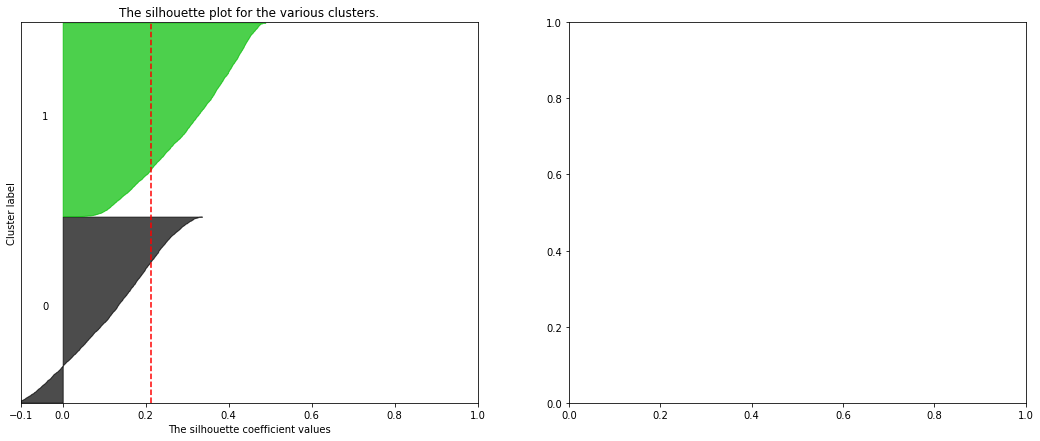

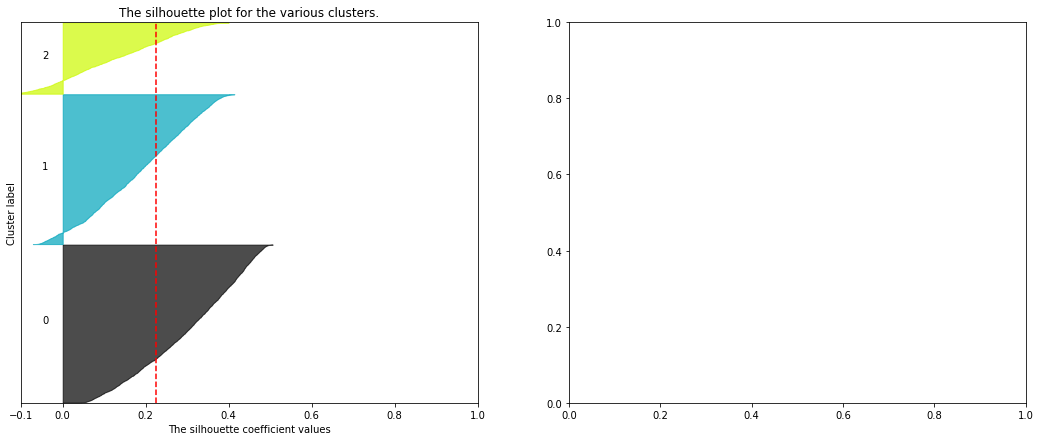

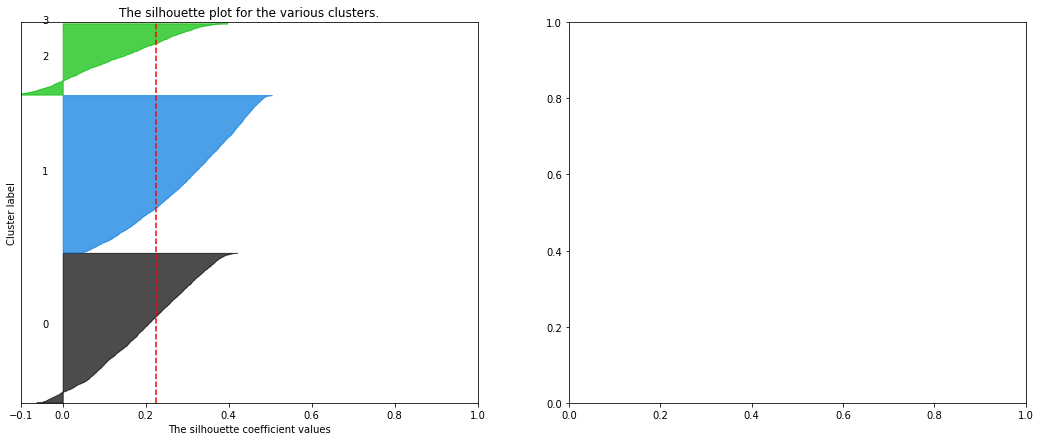

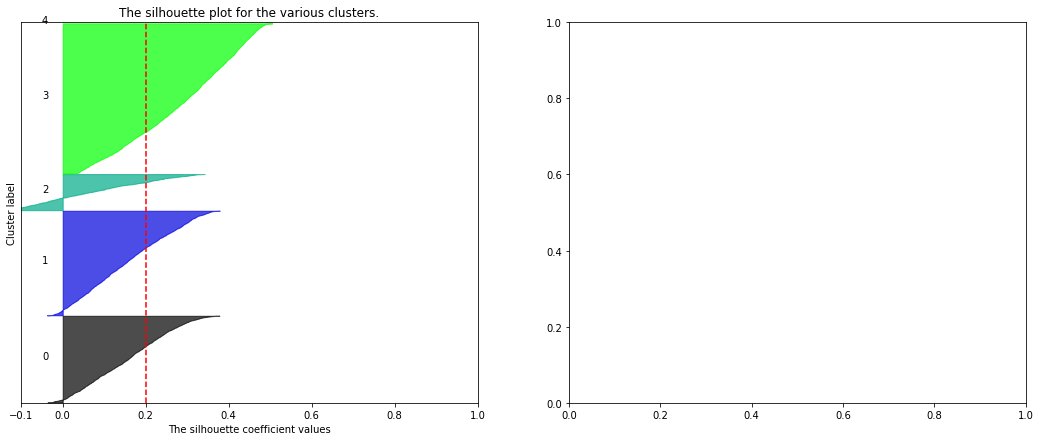

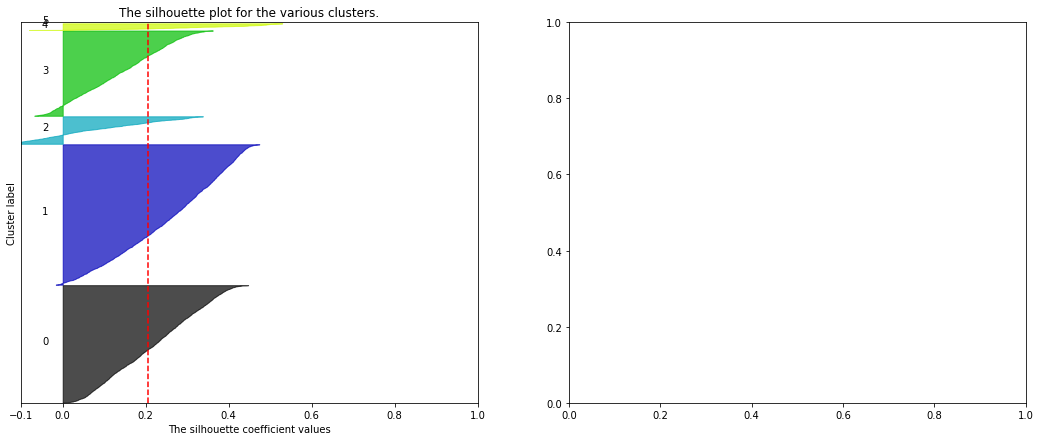

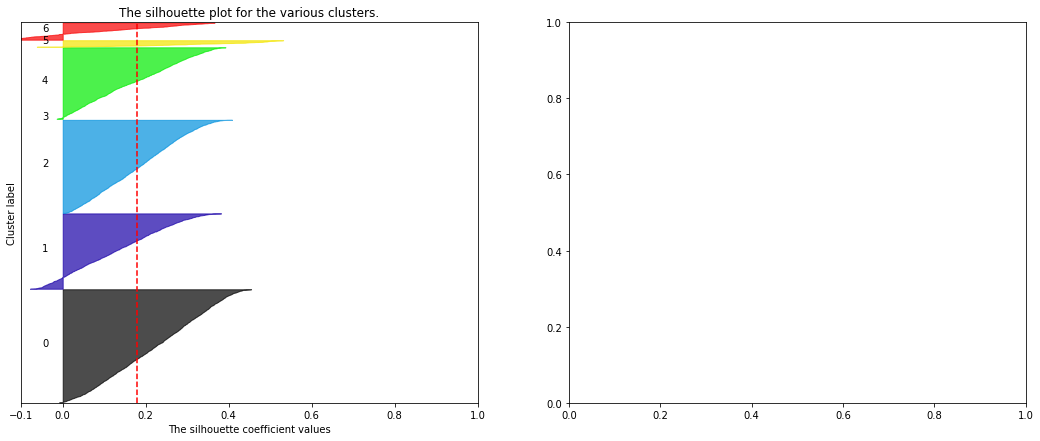

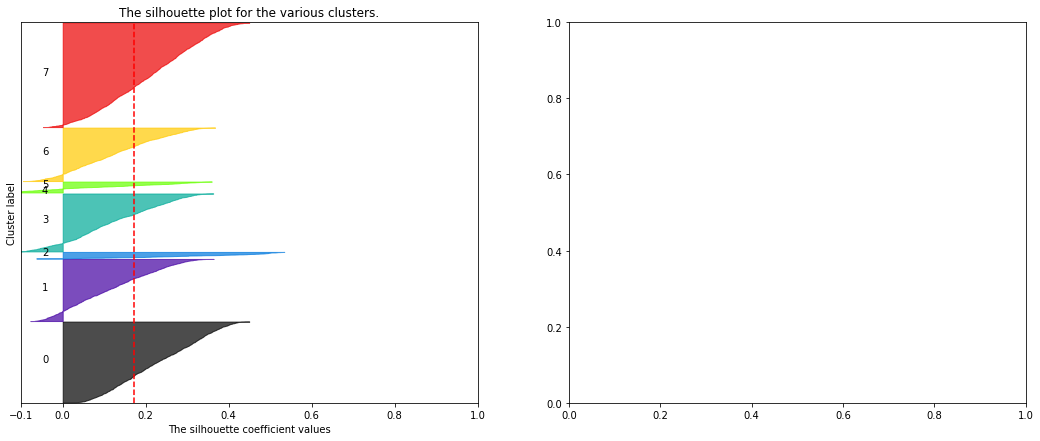

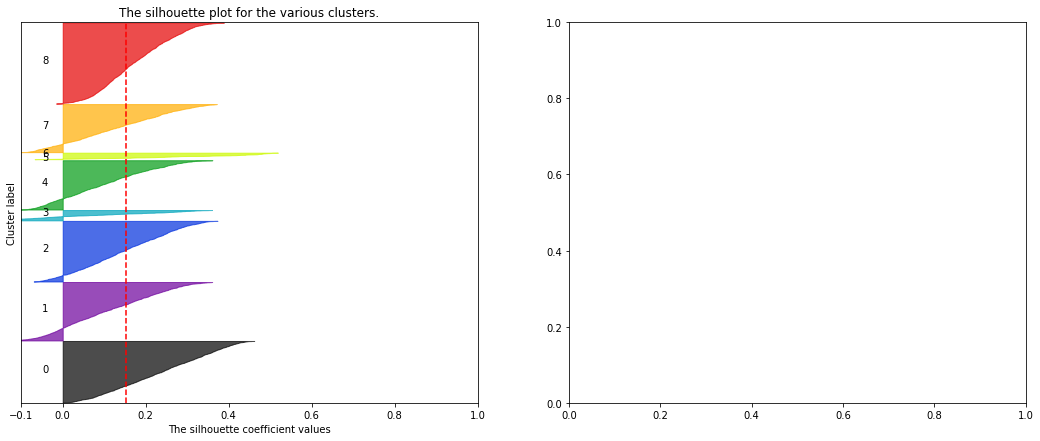

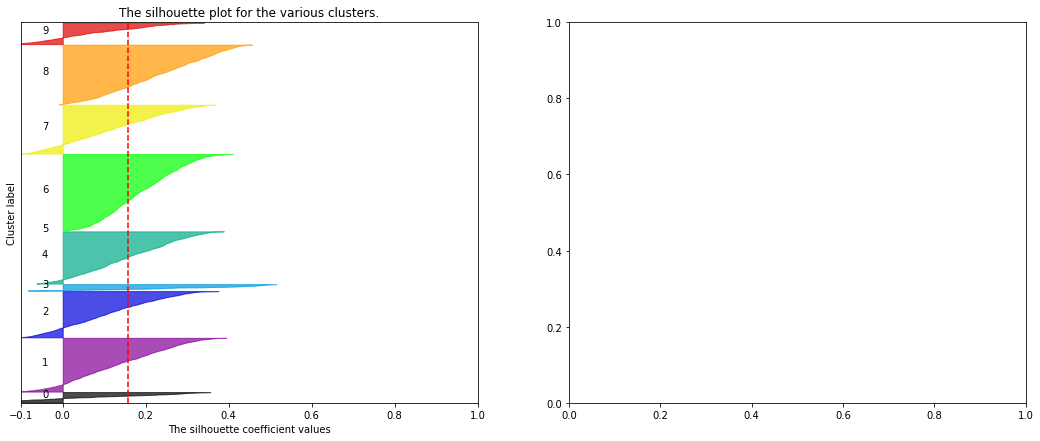

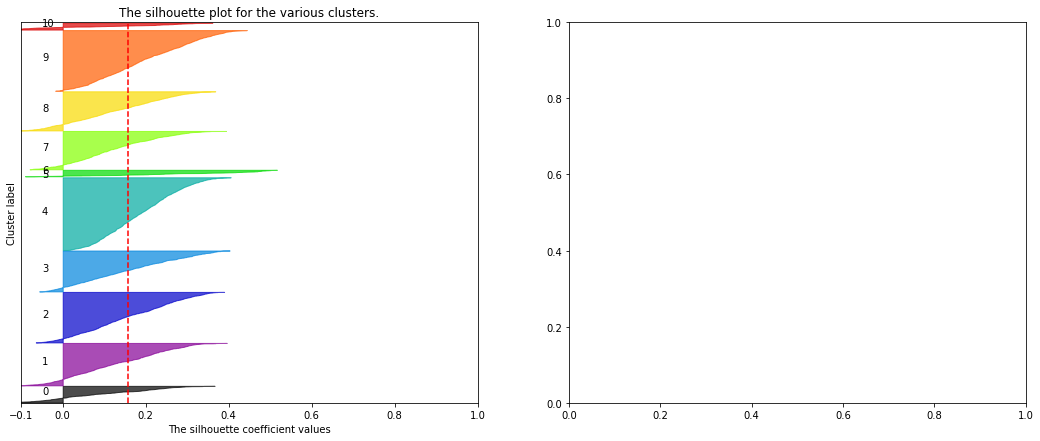

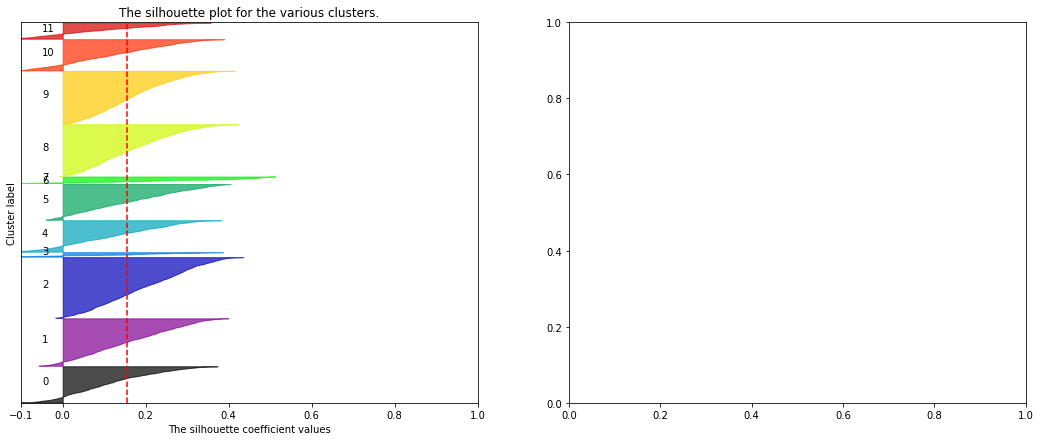

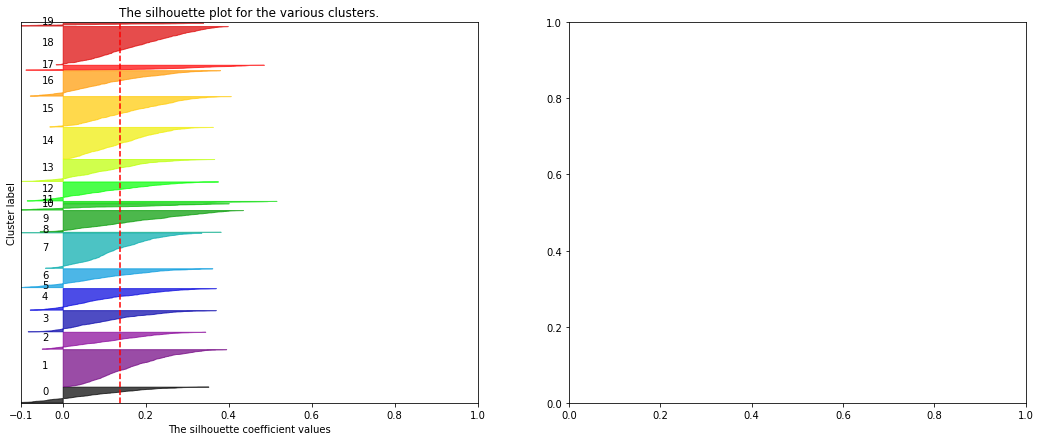

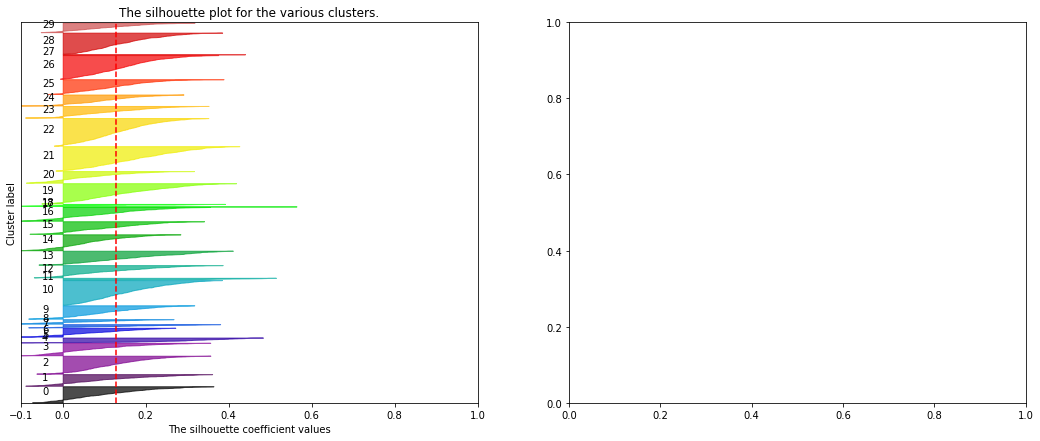

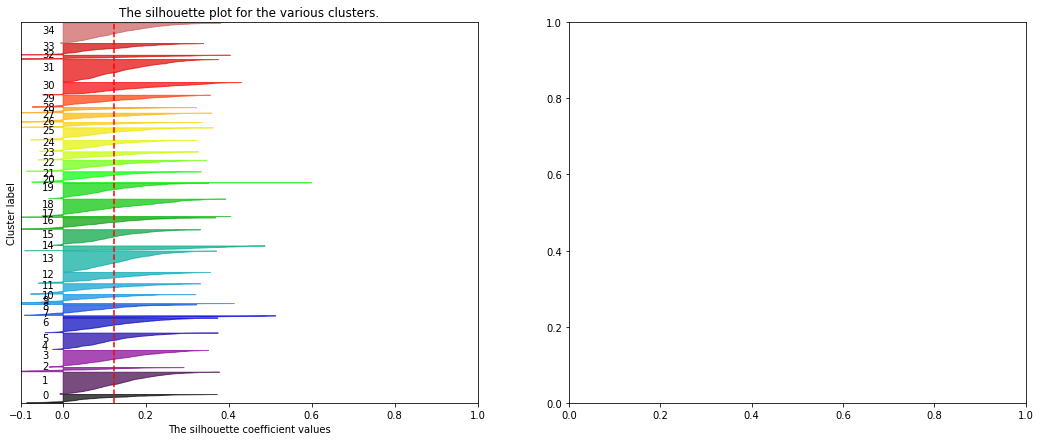

In [99]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,20,30,35]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

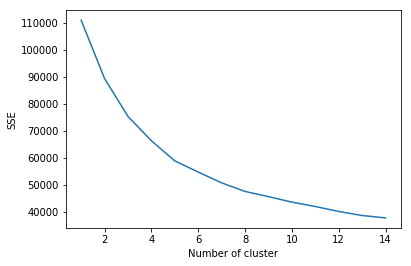

In [100]:

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(scaled_df)
    scaled_df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [83]:
kmeans = KMeans(n_clusters=5)

In [84]:
kmeans.fit(scaled_df)
y_kmeans = kmeans.predict(scaled_df)

In [105]:
customers['clusters']=y_kmeans

In [86]:
customers['clusters'].value_counts()

0    3598
1    1789
2    1568
4     549
3     416
Name: clusters, dtype: int64

In [109]:
for i in range(0,5):
    cluster_0=customers[customers['clusters']==i]
    print("\n Cluster: " + str(i+1) +" Total Sales=" + str(cluster_0['sales_cus'].sum()))


 Cluster: 1 Total Sales=33871992.1

 Cluster: 2 Total Sales=15801343.810000002

 Cluster: 3 Total Sales=13089421.0

 Cluster: 4 Total Sales=4588185.92

 Cluster: 5 Total Sales=6790329.67


In [87]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, scaled_df)
closest

array([ 761, 5124, 4479, 2963, 5787], dtype=int64)

In [88]:
customers.iloc[closest[:],:]

,promo_per,unique_store,uniq_prod,disc_per,Q2,Q3,Q4,mean,c.Q2,c.Q3,c.Q4,c.mean,clusters
761,0.309492,8,1053,0.147122,8.550,20.26,32.2500,24.524315,0.0,0.0,0.150000,0.096557,0
5124,0.418241,7,995,0.193018,7.230,14.22,26.9400,20.966295,0.0,0.0,0.300683,0.144457,1
4479,0.216029,6,789,0.112036,8.915,15.89,28.4800,20.813569,0.0,0.0,0.000000,0.067805,2
2963,0.279601,4,994,0.133572,15.575,30.16,50.1150,37.459261,0.0,0.0,0.109091,0.085650,3
5787,0.359302,5,1093,0.177820,17.465,36.52,61.4575,44.339533,0.0,0.0,0.251572,0.126044,4


In [89]:
scaled_df.iloc[closest[:],:]

,promo_per,unique_store,uniq_prod,disc_per,Q2,Q3,Q4,mean,c.Q2,c.Q3,c.Q4,c.mean,clusters
761,-0.084216,0.284907,0.276555,-0.268788,-0.315679,0.242068,-0.055389,-0.051340,-0.011237,-0.129099,-0.139651,-0.260052,2
5124,1.252870,0.075762,0.049569,0.734150,-0.602359,-0.532225,-0.435178,-0.423345,-0.011237,-0.129099,1.129305,1.190460,9
4479,-1.233346,-0.133383,-0.756622,-1.035505,-0.236408,-0.318141,-0.325032,-0.439313,-0.011237,-0.129099,-1.402859,-1.130717,5
2963,-0.451724,-0.551672,0.045656,-0.564883,1.210020,1.511191,1.222378,1.301058,-0.011237,-0.129099,-0.484162,-0.590341,13
5787,0.528207,-0.342527,0.433097,0.402030,1.620493,2.326506,2.033633,2.020416,-0.011237,-0.129099,0.715728,0.632881,8


In [60]:
customers['disc_per'].describe()

count    7920.000000
mean        0.159422
std         0.045764
min         0.034121
25%         0.127091
50%         0.158654
75%         0.190315
max         0.373796
Name: disc_per, dtype: float64